# 1회차 실습 과제: 통계적 사고와 기술통계

## 문제 항목

| 문제 | 주제 | 사용 데이터 |
|------|------|-----------|
| 문제 1 | 중심 경향 측도 (평균, 중앙값, 최빈값, 절사평균, 가중평균) | EMISSIONS |
| 문제 2 | 산포도 측도 (분산, 표준편차, 범위, IQR, 변동계수, 이상치 탐지) | COMB (L/100 km), ENGINE SIZE |
| 문제 3 | 분포의 형태 (왜도, 첨도) | 수치형 변수 전체 |
| 도전 과제 | 라이브러리 없이 기술통계 직접 구현 | 순수 Python |

---

## 데이터 설명

**파일명**: `차량_연비_데이터(2000-2022).csv`

2000~2022년 차량 연비 데이터

| 컬럼 | 설명 |
|------|------|
| YEAR | 차량 제조 연도 |
| MAKE | 제조사 (예: 현대, BMW) |
| MODEL | 차량 모델명 (예: Sonata, Model S) |
| VEHICLE CLASS | 차량 분류 (예: SUV, 세단). 4WD/4X4: 사륜구동, AWD: 전륜구동, FFV: 유연연료 차량 |
| ENGINE SIZE | 엔진 배기량 (단위: 리터) |
| CYLINDERS | 실린더 개수. 출력과 연비에 영향 |
| TRANSMISSION | 변속기 종류. A: 자동, M: 수동, AS: 자동 선택변속기, AV: 무단변속기. 숫자는 기어 수(3~10단) |
| FUEL | 연료 종류. X: 일반 가솔린, Z: 고급 가솔린, D: 디젤, E: 에탄올(E85), N: 천연가스 |
| CITY (L/100 km) | 도심 연비 (연료 소비량) |
| HWY (L/100 km) | 고속도로 연비 (연료 소비량) |
| COMB (L/100 km) | 복합 연비. 도심(55%) + 고속도로(45%) 종합 |
| COMB (mpg) | 복합 연비 (단위: MPG) |
| EMISSIONS | CO2 배출량 (단위: g/km) |

---

In [1]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import platform
import os

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("="*60)
print("1회차 실습 과제: 통계적 사고와 기술통계")
print("="*60)


1회차 실습 과제: 통계적 사고와 기술통계


In [2]:
# 데이터 로드
DATA_PATH = os.path.join('data_01', '차량_연비_데이터(20022022).csv')
df = pd.read_csv(DATA_PATH)

# 데이터 기본 검증
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             22556 non-null  int64  
 1   MAKE             22556 non-null  object 
 2   MODEL            22556 non-null  object 
 3   VEHICLE CLASS    22556 non-null  object 
 4   ENGINE SIZE      22556 non-null  float64
 5   CYLINDERS        22556 non-null  int64  
 6   TRANSMISSION     22556 non-null  object 
 7   FUEL             22556 non-null  object 
 8   CITY (L/100 km)  22556 non-null  float64
 9   HWY (L/100 km)   22556 non-null  float64
 10  COMB (L/100 km)  22556 non-null  float64
 11  COMB (mpg)       22556 non-null  int64  
 12  EMISSIONS        22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [3]:
# 데이터 전처리
df['VEHICLE CLASS'] = (df['VEHICLE CLASS']
                       .str.upper()
                       .str.replace(':', ' -')
                       .str.replace('  ', ' ')
                       .str.strip())

# 범주 값별 빈도 확인
df['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
COMPACT                     3127
MID-SIZE                    2960
SUV                         2640
PICKUP TRUCK - STANDARD     2204
SUBCOMPACT                  2010
SUV - SMALL                 1756
FULL-SIZE                   1503
TWO-SEATER                  1312
SUV - STANDARD              1122
MINICOMPACT                  994
STATION WAGON - SMALL        877
PICKUP TRUCK - SMALL         511
MINIVAN                      408
STATION WAGON - MID-SIZE     387
VAN - CARGO                  332
VAN - PASSENGER              299
SPECIAL PURPOSE VEHICLE      114
Name: count, dtype: int64

---

## 📝 실습 문제 1: 중심 경향 측도

### 배경
차량의 **EMISSIONS(CO2 배출량)** 데이터로 다양한 대표값을 계산하고 비교합니다.

### 이론 복습

| 대표값 | 특징 | 이상치 민감도 |
|--------|------|:-------------:|
| 산술평균 | 모든 값 반영 | 매우 민감 |
| 중앙값 | 정렬 후 가운데 값 | 강건함 |
| 최빈값 | 가장 빈번한 값 | - |
| 절사평균 | 양끝 제거 후 평균 | 중간 |
| 가중평균 | 가중치 반영 평균 | 매우 민감 |

### 수행할 작업
1. EMISSIONS의 산술평균, 중앙값, 최빈값 계산
2. 10%, 20% 절사평균 계산 및 산술평균과 비교
3. 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
4. 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
5. 결과 해석: 어떤 상황에서 어떤 대표값이 적절한지 정리

In [4]:
# TODO 1: 기본 대표값 계산 (산술평균, 중앙값, 최빈값)
print(f'EMISSION의 산술평균: {df['EMISSIONS'].mean():.2f}')
print(f'EMISSION의 중앙값: {df['EMISSIONS'].median()}')
print(f'EMISSION의 최빈값: {df['EMISSIONS'].mode()}')
print('='*30)

# TODO 2: 절사평균 계산
print(f'EMISSION의 절사평균(10% 제외): {stats.trim_mean(df['EMISSIONS'], 0.1):.2f}')
print(f'EMISSION의 절사평균(20% 제외): {stats.trim_mean(df['EMISSIONS'], 0.2):.2f}')
print('산술평균과 비교했을 때, 평균이 왼쪽으로 이동하긴 했으나 큰 차이는 없음')
print('='*30)

# TODO 3: 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
# 3-1. 차량등급별 평균구하기
target_class = ['COMPACT', 'MID-SIZE', 'SUV']
filtered_df = df[df['VEHICLE CLASS'].isin(target_class)]
vehicle_class_avg = filtered_df.groupby('VEHICLE CLASS')['EMISSIONS'].mean() # 인덱스가 알파벳 순서대로 정렬됨
display((vehicle_class_avg.round(2)))

# 3-2. 등급별 가중치를 고려한 가중평균 구하기
weights = np.array([0.5, 0.3, 0.2])
weighted_avg = np.average(vehicle_class_avg.loc[target_class], weights=weights) # .loc[target_class]를 넣어서 정한 가중치와 순서를 일치시킴
print(f'차량 등급별 가중평균: {weighted_avg:.2f}')
print('='*30)

# TODO 4: 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
print(f'COMPACT 등급의 평균: {df[df['VEHICLE CLASS'] == 'COMPACT']['EMISSIONS'].mean():.2f}')
print(f'COMPACT 등급의 중앙값: {df[df['VEHICLE CLASS'] == 'COMPACT']['EMISSIONS'].median()}')
print('-'*5)
print(f'MID-SIZE 등급의 평균: {df[df['VEHICLE CLASS'] == 'MID-SIZE']['EMISSIONS'].mean():.2f}')
print(f'MID-SIZE 등급의 중앙값: {df[df['VEHICLE CLASS'] == 'MID-SIZE']['EMISSIONS'].median()}')
print('-'*5)
print(f'SUV 등급의 평균: {df[df['VEHICLE CLASS'] == 'SUV']['EMISSIONS'].mean():.2f}')
print(f'SUV 등급의 중앙값:{df[df['VEHICLE CLASS'] == 'SUV']['EMISSIONS'].median()}')
print('='*30)

# TODO 5: 결과 해석 (print문으로 작성)
print('판매량과 관계없이 단순히 출시된 차량들의 차종 모델별 CO2 배출량을 비교할 때는 산술평균이 유용할 것이다.')
print('그러나 실제로 팔린 차량들에 의해 배출된 CO2의 평균을 구하고 싶을 때는 차량이 팔린 비율을 고려한 가중평균이 유용할 것이다. ')

EMISSION의 산술평균: 250.07
EMISSION의 중앙값: 243.0
EMISSION의 최빈값: 0    221
Name: EMISSIONS, dtype: int64
EMISSION의 절사평균(10% 제외): 247.34
EMISSION의 절사평균(20% 제외): 245.40
산술평균과 비교했을 때, 평균이 왼쪽으로 이동하긴 했으나 큰 차이는 없음


VEHICLE CLASS
COMPACT     211.54
MID-SIZE    223.70
SUV         270.30
Name: EMISSIONS, dtype: float64

차량 등급별 가중평균: 226.94
COMPACT 등급의 평균: 211.54
COMPACT 등급의 중앙값: 207.0
-----
MID-SIZE 등급의 평균: 223.70
MID-SIZE 등급의 중앙값: 221.0
-----
SUV 등급의 평균: 270.30
SUV 등급의 중앙값:267.0
판매량과 관계없이 단순히 출시된 차량들의 차종 모델별 CO2 배출량을 비교할 때는 산술평균이 유용할 것이다.
그러나 실제로 팔린 차량들에 의해 배출된 CO2의 평균을 구하고 싶을 때는 차량이 팔린 비율을 고려한 가중평균이 유용할 것이다. 


---

## 📝 실습 문제 2: 산포도 측도

### 배경
**COMB (L/100 km)** 와 **ENGINE SIZE**의 산포를 분석합니다.

### 이론 복습

| 지표 | 계산 방식 | 이상치 민감도 |
|------|----------|:------------:|
| 분산/표준편차 | 평균 기준 편차 제곱 | 민감 |
| 범위 | 최대 - 최소 | 매우 민감 |
| IQR | Q3 - Q1 | 강건 |

### 이상치 탐지 방법
- **IQR 방법**: Q1 - 1.5×IQR 미만 또는 Q3 + 1.5×IQR 초과
- **Z-score 방법**: |Z| > 2 또는 3

### 수행할 작업
1. 두 변수의 분산, 표준편차, 범위, IQR 계산
2. 변동계수(CV) 계산하여 상대적 산포 비교
3. IQR 방법과 Z-score 방법으로 이상치 탐지 및 비교
4. 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
5. 차량등급별(COMPACT, MID-SIZE, SUV) 두 변수의 표준편차 비교
6. 결과 해석

COMB(L/100 km)의 분산: 8.473
COMB(L/100 km)의 표준편차: 2.911
COMB(L/100 km)의 범위: 22.5
COMB(L/100 km)의 IQR: 3.60


ENGINE SIZE의 분산: 1.783
ENGINE SIZE의 표준편차: 1.335
ENGINE SIZE의 범위: 7.6
ENGINE SIZE의 IQR: 1.90
COMB (L/100 km)의 변동계수(CV): 0.264
ENGINE SIZE의 변동계수(CV): 0.398
IQR을 활용한 방법
COMB (L/100 km): 3.700미만이거나 18.100초과라면 이상치로 판단함
ENGINE SIZE: -0.550미만이거나 7.050초과라면 이상치로 판단함


Z-score를 활용한 방법 (이상치의 기준: |Z| > 2 설정)
COMB (L/100 km) 데이터에서 Z-score의 하한값은 5.213이고, 상한값은 16.856이다.
ENGINE SIZE 데이터에서 Z-score의 하한값은 0.686이고, 상한값은 6.027이다.
차량등급별(COMPACT, MID-SIZE, SUV) 표준편차


,COMB (L/100 km),ENGINE SIZE
VEHICLE CLASS,,
COMPACT,2.060390,1.078633
MID-SIZE,2.395101,1.194977
SUV,2.705243,1.198494


결과 해석
엔진 배기량은 연비에 비해 차량마다 차이가 더 큰 편이다. 
SUV 등급에는 다양한 크기의 차량이 존재해 엔진 배기량과 연비가 가장 넓게 분포되어 있다.


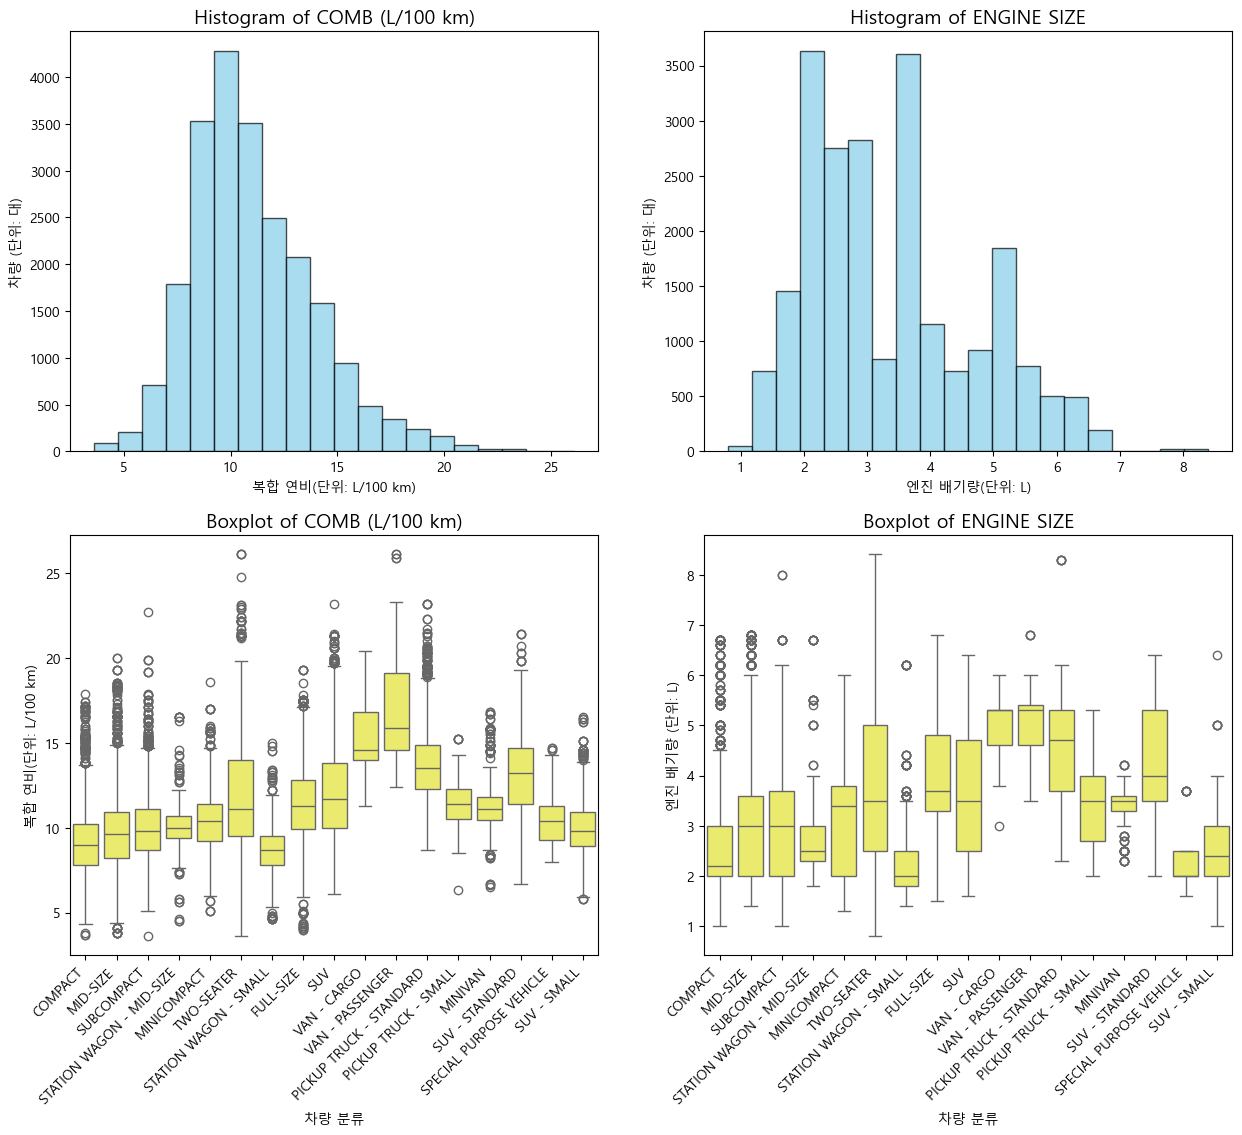

In [5]:
# TODO 1: 두 변수의 산포 측도 계산
print(f'COMB(L/100 km)의 분산: {df['COMB (L/100 km)'].var(ddof=0):.3f}') # ddof를 0이라 하면 모집단의 값으로, 1이라 하면 표본집단의 값으로
print(f'COMB(L/100 km)의 표준편차: {df['COMB (L/100 km)'].std(ddof=0):.3f}')
print(f'COMB(L/100 km)의 범위: {df['COMB (L/100 km)'].max() - df['COMB (L/100 km)'].min():.1f}')

COMB_Q1 = df['COMB (L/100 km)'].quantile(0.25)
COMB_Q3 = df['COMB (L/100 km)'].quantile(0.75)
IQR_COMB = COMB_Q3 - COMB_Q1
print(f'COMB(L/100 km)의 IQR: {IQR_COMB:.2f}')
print('\n')

print(f'ENGINE SIZE의 분산: {df['ENGINE SIZE'].var(ddof=0):.3f}')
print(f'ENGINE SIZE의 표준편차: {df['ENGINE SIZE'].std(ddof=0):.3f}')
print(f'ENGINE SIZE의 범위: {df['ENGINE SIZE'].max() - df['ENGINE SIZE'].min():.1f}')

ENGINE_SIZE_Q1 = df['ENGINE SIZE'].quantile(0.25)
ENGINE_SIZE_Q3 = df['ENGINE SIZE'].quantile(0.75)
IQR_ENGINE_SIZE = ENGINE_SIZE_Q3 - ENGINE_SIZE_Q1
print(f'ENGINE SIZE의 IQR: {IQR_ENGINE_SIZE:.2f}')
print('='*30)

# TODO 2: 변동계수(CV) 계산
def cal_for_cv(data):
    # 데이터를 numpy 배열로 변환 (계산을 더 빠르게 하기 위해서)
    data_array = np.array(data)
    # 평균
    data_avg = np.mean(data_array)
    # 표준편차
    data_std = np.std(data_array, ddof=0)
    
    # 표준편차 또는 평균이 0이라면 계산하지 않고 바로 0 출력
    if data_std == 0 or data_avg == 0:
        return 0
    
    cv_of_data = data_std / data_avg

    return cv_of_data

print(f"COMB (L/100 km)의 변동계수(CV): {cal_for_cv(df['COMB (L/100 km)']):.3f}")
print(f"ENGINE SIZE의 변동계수(CV): {cal_for_cv(df['ENGINE SIZE']):.3f}")
print('='*30)

# TODO 3: 이상치 탐지 (IQR, Z-score)
print('IQR을 활용한 방법')
IQR_COMB_lower = COMB_Q1 - 1.5 * IQR_COMB
IQR_COMB_upper = COMB_Q3 + 1.5 * IQR_COMB
print(f"COMB (L/100 km): {IQR_COMB_lower:.3f}미만이거나 {IQR_COMB_upper:.3f}초과라면 이상치로 판단함")

IQR_ENGINE_SIZE_lower = ENGINE_SIZE_Q1 - 1.5 * IQR_ENGINE_SIZE
IQR_ENGINE_SIZE_upper = ENGINE_SIZE_Q3 + 1.5 * IQR_ENGINE_SIZE
print(f"ENGINE SIZE: {IQR_ENGINE_SIZE_lower:.3f}미만이거나 {IQR_ENGINE_SIZE_upper:.3f}초과라면 이상치로 판단함")
print('\n')
print('Z-score를 활용한 방법 (이상치의 기준: |Z| > 2 설정)')
z_COMB_lower = df['COMB (L/100 km)'].mean() - 2 * df['COMB (L/100 km)'].std(ddof=0)
z_COMB_upper = df['COMB (L/100 km)'].mean() + 2 * df['COMB (L/100 km)'].std(ddof=0)
print(f'COMB (L/100 km) 데이터에서 Z-score의 하한값은 {z_COMB_lower:.3f}이고, 상한값은 {z_COMB_upper:.3f}이다.')

z_ENGINE_SIZE_lower = df['ENGINE SIZE'].mean() - 2 * df['ENGINE SIZE'].std(ddof=0)
z_ENGINE_SIZE_upper = df['ENGINE SIZE'].mean() + 2 * df['ENGINE SIZE'].std(ddof=0)
print(f'ENGINE SIZE 데이터에서 Z-score의 하한값은 {z_ENGINE_SIZE_lower:.3f}이고, 상한값은 {z_ENGINE_SIZE_upper:.3f}이다.')
print('='*30)

# TODO 4: 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
fig, axes = plt.subplots(2,2, figsize=(15, 12))

# 4-1. 히스토그램
axes[0, 0].hist(df['COMB (L/100 km)'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Histogram of COMB (L/100 km)', fontsize=14)
axes[0, 0].set_xlabel('복합 연비(단위: L/100 km)')
axes[0, 0].set_ylabel('차량 (단위: 대)')

axes[0, 1].hist(df['ENGINE SIZE'], bins=20, color='skyblue',edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Histogram of ENGINE SIZE', fontsize=14)
axes[0, 1].set_xlabel('엔진 배기량(단위: L)')
axes[0, 1].set_ylabel('차량 (단위: 대)')

# 4-2. 박스 플롯
sns.boxplot(data=df, x='VEHICLE CLASS', y='COMB (L/100 km)', ax=axes[1, 0], color='#FFFF59')
axes[1, 0].set_title('Boxplot of COMB (L/100 km)', fontsize=14)
axes[1, 0].set_xlabel('차량 분류')
axes[1, 0].set_ylabel('복합 연비(단위: L/100 km)')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right', fontsize=10)

sns.boxplot(data=df, x='VEHICLE CLASS', y='ENGINE SIZE', ax=axes[1, 1], color='#FFFF59')
axes[1, 1].set_title('Boxplot of ENGINE SIZE', fontsize=14)
axes[1, 1].set_xlabel('차량 분류')
axes[1, 1].set_ylabel('엔진 배기량 (단위: L)')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right', fontsize=10)

# TODO 5: 차량등급별(COMPACT, MID-SIZE, SUV) 표준편차 비교
filtered_df = df[df['VEHICLE CLASS'].isin(target_class)]
answer = filtered_df.groupby('VEHICLE CLASS')[['COMB (L/100 km)', 'ENGINE SIZE']].std()
print('차량등급별(COMPACT, MID-SIZE, SUV) 표준편차')
display(answer)
print('='*30)

# TODO 6: 결과 해석
print('결과 해석')
print('엔진 배기량은 연비에 비해 차량마다 차이가 더 큰 편이다. \nSUV 등급에는 다양한 크기의 차량이 존재해 엔진 배기량과 연비가 가장 넓게 분포되어 있다.')

---

## 📝 실습 문제 3: 분포의 형태 (왜도, 첨도)

### 배경
4가지 수치형 변수의 **왜도와 첨도**를 분석하여 분포 형태를 파악합니다.

### 이론 복습

**왜도**
| 왜도 | 의미 | 평균 vs 중앙값 |
|------|------|---------------|
| = 0 | 대칭 | 평균 ≈ 중앙값 |
| > 0 | 오른쪽 꼬리 | 평균 > 중앙값 |
| < 0 | 왼쪽 꼬리 | 평균 < 중앙값 |


**초과 첨도**
| 첨도 | 의미 |
|------|------|
| = 0 | 정규분포와 동일 |
| > 0 | 꼬리 두꺼움 (극단값 많음) |
| < 0 | 꼬리 얇음 (극단값 적음) |

### 수행할 작업
1. 4개 변수의 왜도/첨도 계산: ENGINE SIZE, COMB (L/100 km), COMB (mpg), EMISSIONS
2. 결과를 DataFrame으로 정리 (왜도/첨도 해석 컬럼 포함)
3. 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시)
    - 각 그래프에 평균(빨강)과 중앙값(초록) 수직선 표시
4. 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
5. 결과 해석

ENGINE_SIZE의 왜도: 0.631
ENGINE_SIZE의 첨도: -0.395
 
COMB (L/100 km)의 왜도: 0.817
COMB (L/100 km)의 첨도: 1.055
 
COMB (mpg)의 왜도: 1.173
COMB (mpg)의 첨도: 3.644
 
EMISSIONS의 왜도: 0.535
EMISSIONS의 첨도: 0.615
왜도/첨도 해석이 추가된 Data Frame


,변수,왜도,첨도,왜도 해석,첨도 해석
0,ENGINE SIZE,0.631264,-0.394947,"중앙값이 평균보다 작고, 오른쪽으로 꼬리가 긺",꼬리가 얇아져 극단값이 생길 가능성이 감소함
1,COMB (L/100 km),0.817065,1.054642,"중앙값이 평균보다 작고, 오른쪽으로 꼬리가 긺",꼬리가 두꺼워져 극단값이 생길 가능성이 상승함
2,COMB (mpg),1.172800,3.643618,"중앙값이 평균보다 작고, 오른쪽으로 꼬리가 긺",꼬리가 두꺼워져 극단값이 생길 가능성이 상승함
3,EMISSIONS,0.534641,0.615430,"중앙값이 평균보다 작고, 오른쪽으로 꼬리가 긺",꼬리가 두꺼워져 극단값이 생길 가능성이 상승함


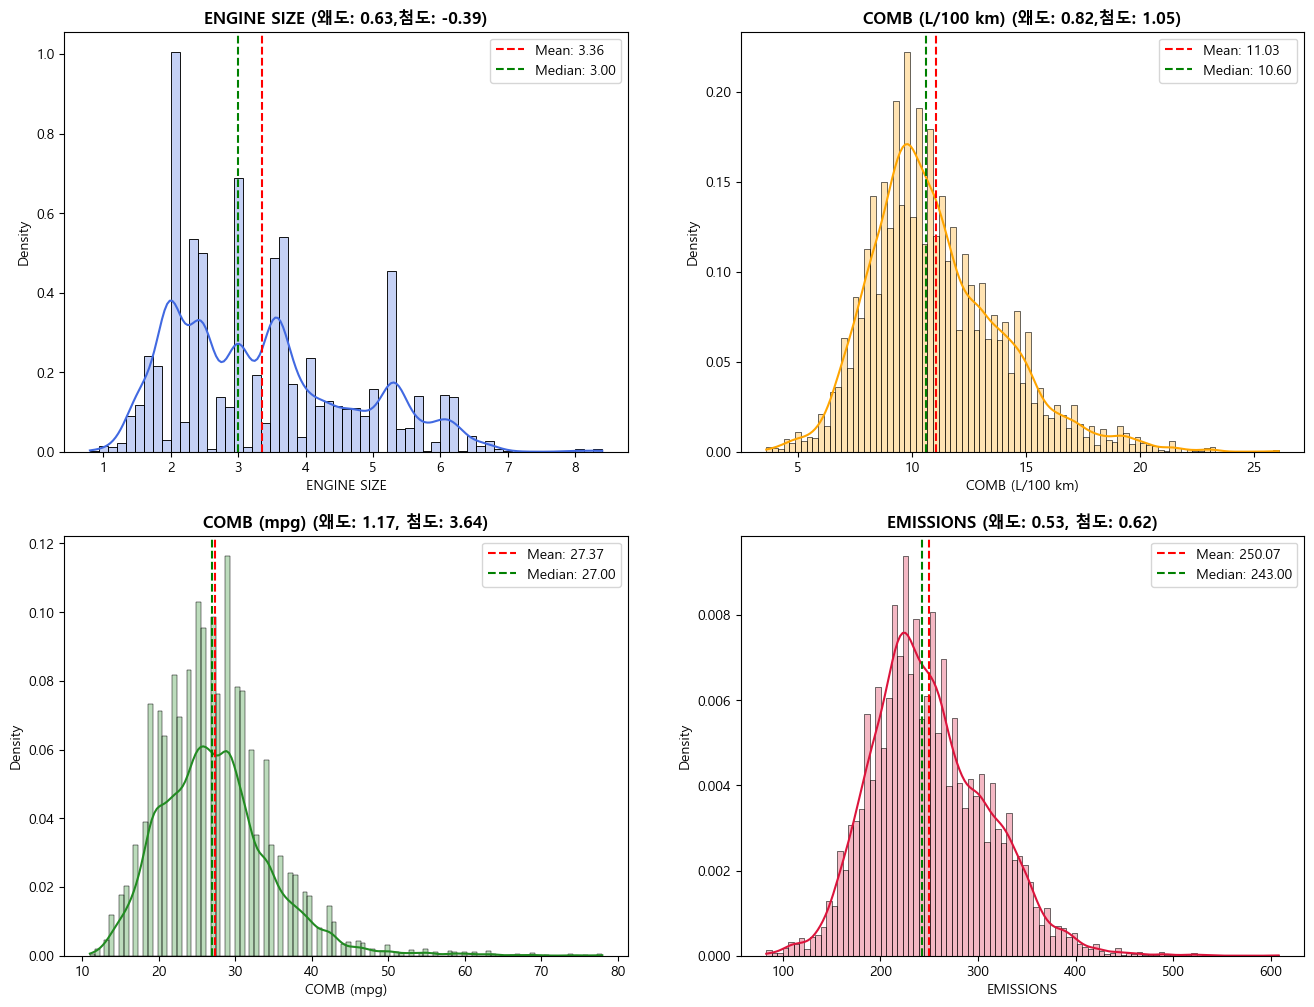

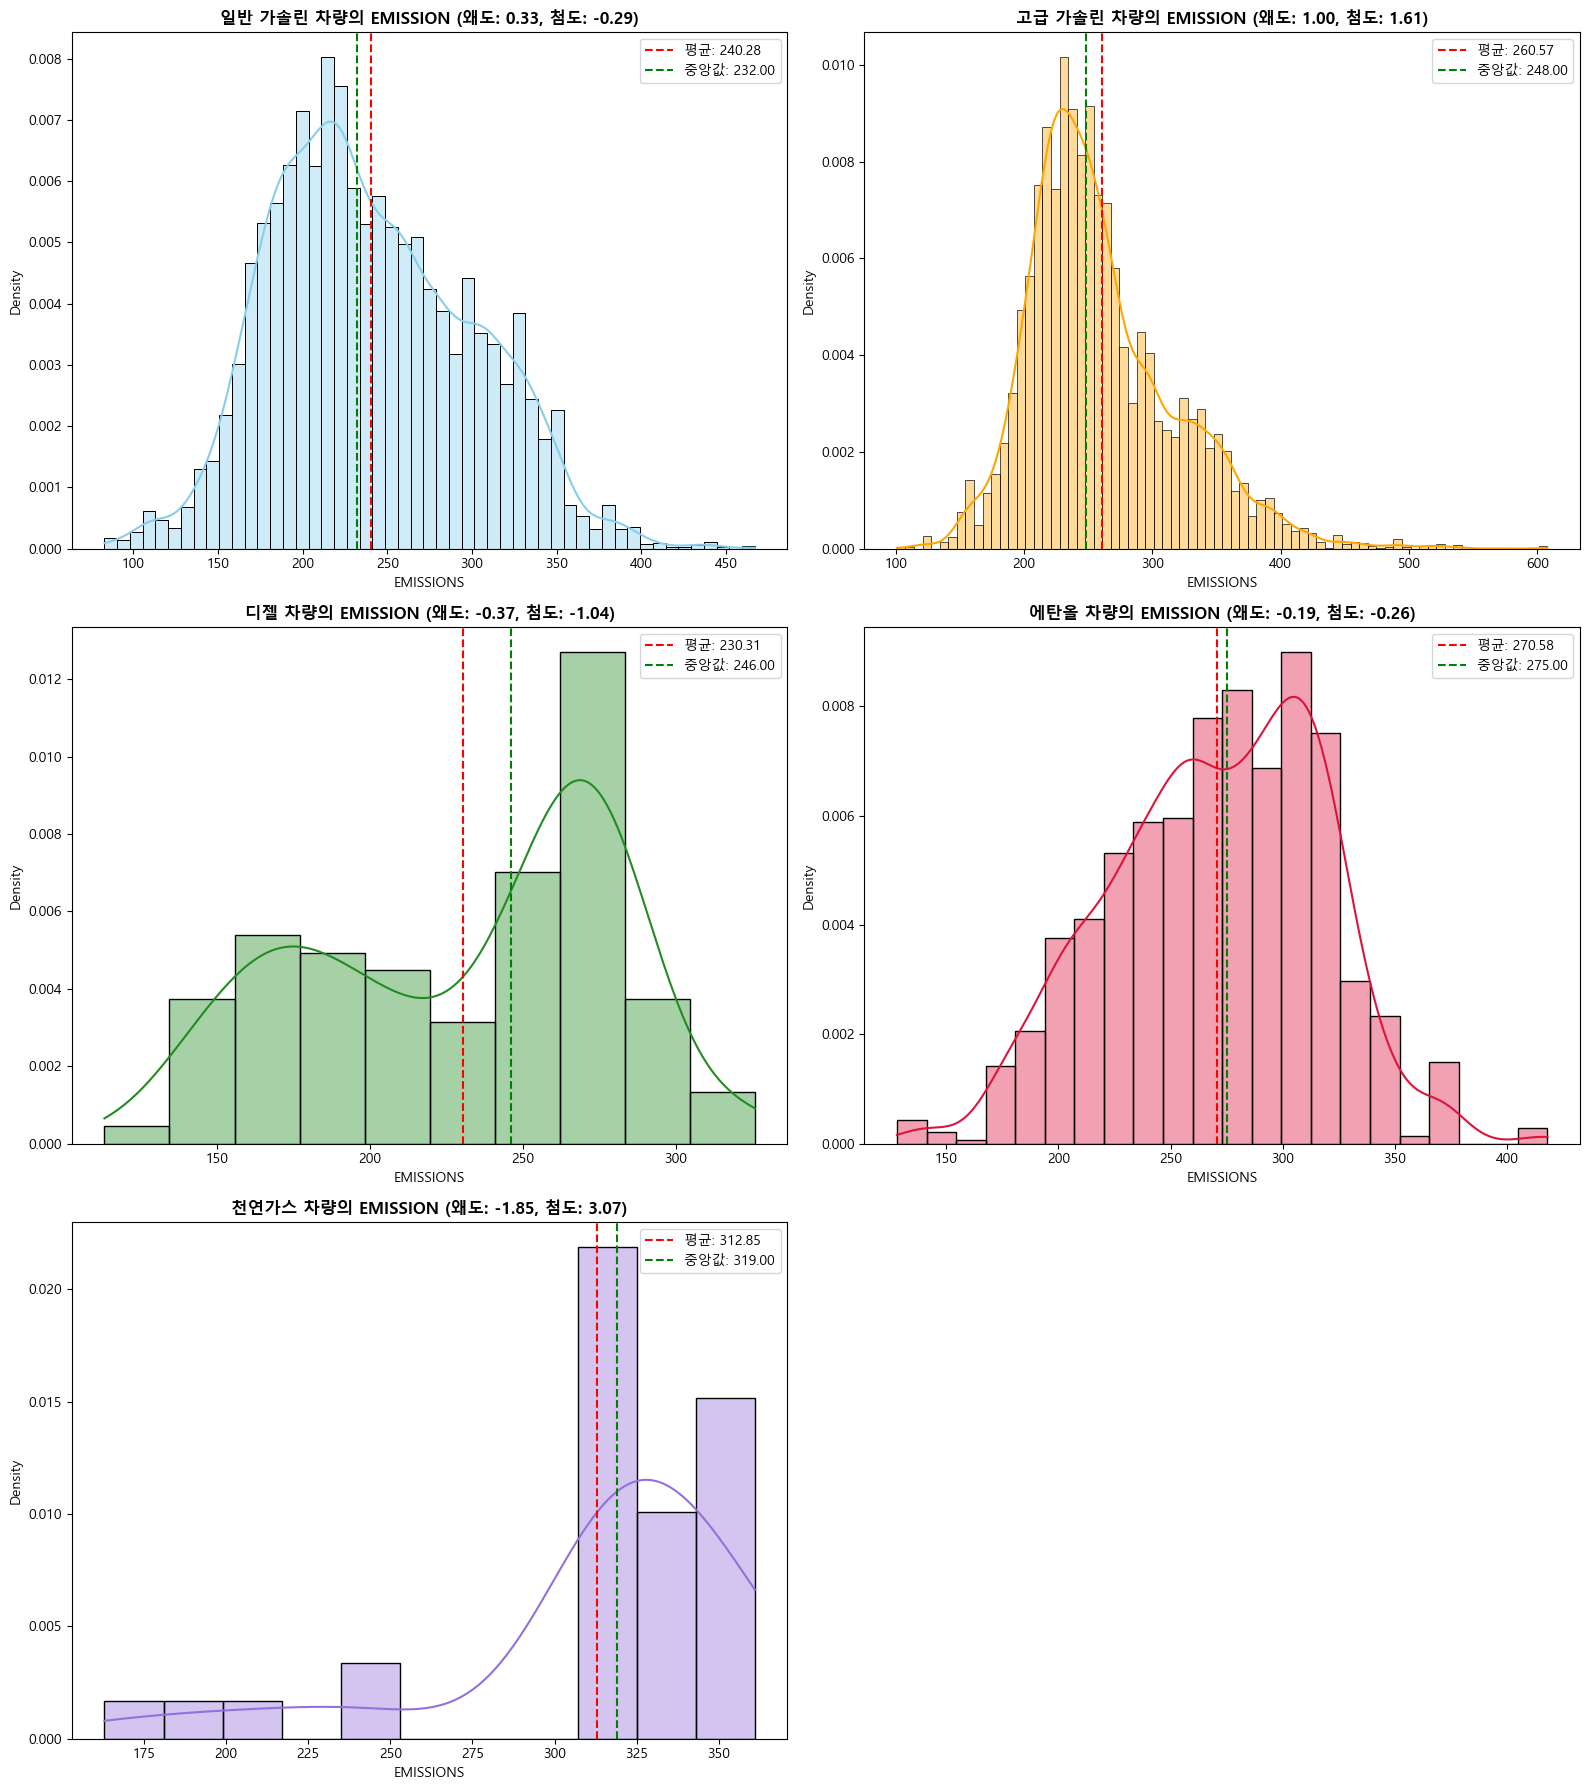

<결과 해석>
앤진 배기량이 적은 차량이 엔진 배기량이 큰 차량보다 많아 그래프가 왼쪽으로 치우쳐져 오른쪽으로 꼬리가 긴 분포이다.
일반 가솔린 차량과 고급 가솔린 차량 중에 고급 가솔린 차량의 CO2 배출량 분포가 왼쪽으로 더 치우쳐져 있다.


In [6]:
numeric_cols = ['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

# TODO 1: 왜도/첨도 계산
es_skew = df['ENGINE SIZE'].skew()
es_kurt = df['ENGINE SIZE'].kurt()
print(f'ENGINE_SIZE의 왜도: {es_skew:.3f}')
print(f'ENGINE_SIZE의 첨도: {es_kurt:.3f}')
print(" ")

comb_L_km_skew = df['COMB (L/100 km)'].skew()
comb_L_km_kurt = df['COMB (L/100 km)'].kurt()
print(f'COMB (L/100 km)의 왜도: {comb_L_km_skew:.3f}')
print(f'COMB (L/100 km)의 첨도: {comb_L_km_kurt:.3f}')
print(" ")

comb_mpg_skew = df['COMB (mpg)'].skew()
comb_mpg_kurt = df['COMB (mpg)'].kurt()
print(f'COMB (mpg)의 왜도: {comb_mpg_skew:.3f}')
print(f'COMB (mpg)의 첨도: {comb_mpg_kurt:.3f}')
print(" ")

emission_skew = df['EMISSIONS'].skew()
emission_kurt = df['EMISSIONS'].kurt()
print(f'EMISSIONS의 왜도: {emission_skew:.3f}')
print(f'EMISSIONS의 첨도: {emission_kurt:.3f}')
print('='*30)

# TODO 2: 결과 DataFrame 정리 (왜도/첨도 해석 컬럼 포함)
skewness = [es_skew, comb_L_km_skew, comb_mpg_skew, emission_skew]
kurtosis = [es_kurt, comb_L_km_kurt, comb_mpg_kurt, emission_kurt]

summary_df = pd.DataFrame({
    '변수':numeric_cols,
    '왜도': skewness,
    '첨도': kurtosis
})

summary_df['왜도 해석'] = summary_df['왜도'].apply(lambda x: '중앙값이 평균보다 작고, 오른쪽으로 꼬리가 긺' if x>0 else ('중앙값이 평균보다 크고, 왼쪽으로 꼬리가 긺' if x<0 else '평균과 중앙값이 동일하고 그래프가 좌우대칭임'))
summary_df['첨도 해석'] = summary_df['첨도'].apply(lambda y: '꼬리가 두꺼워져 극단값이 생길 가능성이 상승함' if y>0 else ('꼬리가 얇아져 극단값이 생길 가능성이 감소함' if y<0 else '정규분포와 동일한 꼬리 두께를 갖고 있음'))

print('왜도/첨도 해석이 추가된 Data Frame')
display(summary_df.head())

print('='*30)

# TODO 3: 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시, 평균/중앙값 수직선)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
# ENGINE_SIZE
sns.histplot(data=df, x='ENGINE SIZE', kde=True, ax=axes[0, 0], color='royalblue', stat="density", alpha=0.3)
axes[0, 0].axvline(df['ENGINE SIZE'].mean(), color='red', linestyle='--', label=f'Mean: {df["ENGINE SIZE"].mean():.2f}')
axes[0, 0].axvline(df['ENGINE SIZE'].median(), color='green', linestyle='--', label=f'Median: {df["ENGINE SIZE"].median():.2f}')
axes[0, 0].set_title(f'ENGINE SIZE (왜도: {es_skew:.2f},첨도: {es_kurt:.2f})', fontweight='bold')
axes[0, 0].legend()

# COMB (L/100 km)
sns.histplot(data=df, x='COMB (L/100 km)', kde=True, ax=axes[0, 1], color='orange', stat="density", alpha=0.3)
axes[0, 1].axvline(df['COMB (L/100 km)'].mean(), color='red', linestyle='--', label=f'Mean: {df["COMB (L/100 km)"].mean():.2f}')
axes[0, 1].axvline(df['COMB (L/100 km)'].median(), color='green', linestyle='--', label=f'Median: {df["COMB (L/100 km)"].median():.2f}')
axes[0, 1].set_title(f'COMB (L/100 km) (왜도: {comb_L_km_skew:.2f},첨도: {comb_L_km_kurt:.2f})', fontweight='bold')
axes[0, 1].legend()

# COMB (mpg)
sns.histplot(data=df, x='COMB (mpg)', kde=True, ax=axes[1, 0], color='forestgreen', stat="density", alpha=0.3)
axes[1, 0].axvline(df['COMB (mpg)'].mean(), color='red', linestyle='--', label=f'Mean: {df["COMB (mpg)"].mean():.2f}')
axes[1, 0].axvline(df['COMB (mpg)'].median(), color='green', linestyle='--', label=f'Median: {df["COMB (mpg)"].median():.2f}')
axes[1, 0].set_title(f'COMB (mpg) (왜도: {comb_mpg_skew:.2f}, 첨도: {comb_mpg_kurt:.2f})', fontweight='bold')
axes[1, 0].legend()

# EMISSIONS
sns.histplot(data=df, x='EMISSIONS', kde=True, ax=axes[1, 1], color='crimson', stat="density", alpha=0.3)
axes[1, 1].axvline(df['EMISSIONS'].mean(), color='red', linestyle='--', label=f'Mean: {df["EMISSIONS"].mean():.2f}')
axes[1, 1].axvline(df['EMISSIONS'].median(), color='green', linestyle='--', label=f'Median: {df["EMISSIONS"].median():.2f}')
axes[1, 1].set_title(f'EMISSIONS (왜도: {emission_skew:.2f}, 첨도: {emission_kurt:.2f})', fontweight='bold')
axes[1, 1].legend()

# TODO 4: 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
# X: 일반 가솔린
df_x = df[df['FUEL'] == 'X']
sns.histplot(data=df_x, x='EMISSIONS', kde=True, ax=axes[0, 0], color='skyblue', stat="density", alpha=0.4)
axes[0, 0].axvline(df_x['EMISSIONS'].mean(), color='red', linestyle='--', label=f'평균: {df_x["EMISSIONS"].mean():.2f}')
axes[0, 0].axvline(df_x['EMISSIONS'].median(), color='green', linestyle='--', label=f'중앙값: {df_x["EMISSIONS"].median():.2f}')
axes[0, 0].set_title(f'일반 가솔린 차량의 EMISSION (왜도: {df_x["EMISSIONS"].skew():.2f}, 첨도: {df_x["EMISSIONS"].kurt():.2f})', fontweight='bold')
axes[0, 0].legend()

# Z : 고급 가솔린
df_z = df[df['FUEL'] == 'Z']
sns.histplot(data=df_z, x='EMISSIONS', kde=True, ax=axes[0, 1], color='orange', stat="density", alpha=0.4)
axes[0, 1].axvline(df_z['EMISSIONS'].mean(), color='red', linestyle='--', label=f'평균: {df_z["EMISSIONS"].mean():.2f}')
axes[0, 1].axvline(df_z['EMISSIONS'].median(), color='green', linestyle='--', label=f'중앙값: {df_z["EMISSIONS"].median():.2f}')
axes[0, 1].set_title(f'고급 가솔린 차량의 EMISSION (왜도: {df_z["EMISSIONS"].skew():.2f}, 첨도: {df_z["EMISSIONS"].kurt():.2f})', fontweight='bold')
axes[0, 1].legend()

# D : 디젤
df_d = df[df['FUEL'] == 'D']
sns.histplot(data=df_d, x='EMISSIONS', kde=True, ax=axes[1, 0], color='forestgreen', stat="density", alpha=0.4)
axes[1, 0].axvline(df_d['EMISSIONS'].mean(), color='red', linestyle='--', label=f'평균: {df_d["EMISSIONS"].mean():.2f}')
axes[1, 0].axvline(df_d['EMISSIONS'].median(), color='green', linestyle='--', label=f'중앙값: {df_d["EMISSIONS"].median():.2f}')
axes[1, 0].set_title(f'디젤 차량의 EMISSION (왜도: {df_d["EMISSIONS"].skew():.2f}, 첨도: {df_d["EMISSIONS"].kurt():.2f})', fontweight='bold')
axes[1, 0].legend()

# E : 에탄올(E85)
df_e = df[df['FUEL'] == 'E']
sns.histplot(data=df_e, x='EMISSIONS', kde=True, ax=axes[1, 1], color='crimson', stat="density", alpha=0.4)
axes[1, 1].axvline(df_e['EMISSIONS'].mean(), color='red', linestyle='--', label=f'평균: {df_e["EMISSIONS"].mean():.2f}')
axes[1, 1].axvline(df_e['EMISSIONS'].median(), color='green', linestyle='--', label=f'중앙값: {df_e["EMISSIONS"].median():.2f}')
axes[1, 1].set_title(f'에탄올 차량의 EMISSION (왜도: {df_e["EMISSIONS"].skew():.2f}, 첨도: {df_e["EMISSIONS"].kurt():.2f})', fontweight='bold')
axes[1, 1].legend()

# N : 천연가스
df_n = df[df['FUEL'] == 'N']
sns.histplot(data=df_n, x='EMISSIONS', kde=True, ax=axes[2, 0], color='mediumpurple', stat="density", alpha=0.4)
axes[2, 0].axvline(df_n['EMISSIONS'].mean(), color='red', linestyle='--', label=f'평균: {df_n["EMISSIONS"].mean():.2f}')
axes[2, 0].axvline(df_n['EMISSIONS'].median(), color='green', linestyle='--', label=f'중앙값: {df_n["EMISSIONS"].median():.2f}')
axes[2, 0].set_title(f'천연가스 차량의 EMISSION (왜도: {df_n["EMISSIONS"].skew():.2f}, 첨도: {df_n["EMISSIONS"].kurt():.2f})', fontweight='bold')
axes[2, 0].legend()

axes[2, 1].set_axis_off() # 사용하지 않은 영역 감추기

plt.tight_layout()
plt.show()

# TODO 5: 결과 해석
print('<결과 해석>')
print('앤진 배기량이 적은 차량이 엔진 배기량이 큰 차량보다 많아 그래프가 왼쪽으로 치우쳐져 오른쪽으로 꼬리가 긴 분포이다.')
print('일반 가솔린 차량과 고급 가솔린 차량 중에 고급 가솔린 차량의 CO2 배출량 분포가 왼쪽으로 더 치우쳐져 있다.')

---

## 🏆 도전 과제: 라이브러리 없이 기술통계 직접 구현

numpy, scipy 없이 **순수 Python**으로 기술통계 함수를 구현합니다.

### 규칙
- `math.sqrt`만 사용 가능
- 내장 함수 `sum()`, `len()`, `sorted()`, `min()`, `max()` 사용 가능

### 구현할 함수

| 함수 | 설명 |
|------|------|
| `my_mean(data)` | 산술평균 |
| `my_trimmed_mean(data, proportion)` | 절사평균 (양쪽 proportion 비율 제거) |
| `my_weighted_mean(data, weights)` | 가중평균 |
| `my_median(data)` | 중앙값 |
| `my_mode(data)` | 최빈값 |
| `my_variance(data, ddof=0)` | 분산 (ddof=0: 모분산, ddof=1: 표본분산) |
| `my_std(data, ddof=0)` | 표준편차 |
| `my_percentile(data, q)` | 퍼센타일 (Nearest Rank 방식) |
| `my_iqr(data)` | 사분위범위 (Q3 - Q1) |

In [7]:
import math

# 산술평균
def my_mean(data):
    return sum(data)/len(data)

# 절사평균
def my_trimmed_mean(data, proportion):
    sorted_data = sorted(data)
    n = len(sorted_data)
    
    # 양쪽에서 제거할 개수 k 계산
    k = int(n * proportion)
    
    trimmed_data = sorted_data[k:n-k]
    return sum(trimmed_data) / len(trimmed_data)

# 가중평균
def my_weighted_mean(data, weights):
    total_weighted_value = 0
    total_weights = 0
    
    for i in range(len(data)):
        total_weighted_value += data[i] * weights[i]
        total_weights += weights[i]
    
    return total_weighted_value / total_weights        

# 중앙값
def my_median(data):
    sort_data = sorted(data)
    n = len(sort_data)
    mid = n // 2
    
    if n % 2 != 0:
        return float(sort_data[mid])
    else:
        return (sort_data[mid-1]+sort_data[mid]) / 2.0

# 최빈값
def my_mode(data):
    counts = {}
    for x in data:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
            
    max_count = 0
    for value in counts.values():
        if value > max_count:
            max_count = value
    
    data_modes = []
    for key in counts: # 같은 숫자의 중복 출력 방지
        if counts[key] == max_count:
            data_modes.append(key)
    
    # 통과하지 못한 테스트 케이스 해결을 위해 추가한 코드-> 최빈값이 하나라면 그냥 숫자가 나오도록 함
    if len(data_modes) == 1:
        return data_modes[0]        
    return data_modes         
    
# 분산
def my_variance(data, ddof=0):
    avg = sum(data) / len(data)
    
    sum_devi = 0
    
    for i in data:
        devi = i - avg
        sq_devi = devi ** 2
        sum_devi += sq_devi

    return sum_devi / (len(data)-ddof)
    
# 표준편차
def my_std(data, ddof=0):
    avg_b = sum(data) / len(data)
    
    sum_devi_b = 0
    
    for i in data:
        devi_b = i - avg_b
        sq_devi_b = devi_b ** 2
        sum_devi_b += sq_devi_b

    data_sqrt = (sum_devi_b / (len(data)-ddof)) ** 0.5
    
    return data_sqrt
    
# 퍼센타일 (Nearest Rank 방식), 백분위수 
def my_percentile(data, q):
    sorted_data_2 = sorted(data)
    n = len(sorted_data_2)
    
    # 인덱스 계산 후, 반올림
    index = int(round((q/100) * (n-1), 0)) # 전체 인덱스 범위 중에서 q %에 해당하는 인덱스 값을 찾는 과정
    return float(sorted_data_2[index])

# 사분위범위(IQR)
def my_iqr(data):
    sorted_data_3 = sorted(data)
    n = len(sorted_data_3)
    
    # Q1, 3에 해당하는 인덱스 선택
    Q1_index = int(round(0.25 * (n-1), 0))
    Q3_index = int(round(0.75 * (n-1), 0))  
    
    # Q1, 3 추출
    data_q1 = sorted_data_3[Q1_index]
    data_q3 = sorted_data_3[Q3_index]
    
    IQR = float(data_q3 - data_q1)
    
    return IQR

In [8]:
# 검증 코드
import numpy as np
from scipy import stats

print("\n" + "="*60)
print("검증 결과")
print("="*60)

# 테스트 데이터
test_data = [4, 7, 2, 9, 1, 5, 3, 8, 6, 5]
test_odd = [3, 1, 4, 1, 5]
test_single = [42]
test_same = [7, 7, 7, 7, 7]
test_negative = [-5, -2, 0, 3, 7]
test_outlier = [1, 2, 3, 4, 100]

all_pass = True
total = 0
passed = 0

def check(name, mine, expected, tol=0.001):
    global all_pass, total, passed
    total += 1
    if mine is None:
        print(f"  ❌ {name}: 미구현")
        all_pass = False
    else:
        try:
            match = abs(float(mine) - float(expected)) < tol
            if match:
                passed += 1
                print(f"  ✅ {name}: {float(mine):.4f}")
            else:
                all_pass = False
                print(f"  ❌ {name}: {float(mine):.4f} (정답: {float(expected):.4f})")
        except:
            all_pass = False
            print(f"  ❌ {name}: 오류 발생")

# 1. 산술평균
print("\n[my_mean]")
check("기본 데이터", my_mean(test_data), np.mean(test_data))
check("홀수 개", my_mean(test_odd), np.mean(test_odd))
check("단일 값", my_mean(test_single), np.mean(test_single))
check("음수 포함", my_mean(test_negative), np.mean(test_negative))

# 2. 절사평균
print("\n[my_trimmed_mean]")
check("20% 절사", my_trimmed_mean(test_outlier, 0.2), stats.trim_mean(test_outlier, 0.2))
check("10% 절사", my_trimmed_mean(test_data, 0.1), stats.trim_mean(test_data, 0.1))
check("0% 절사", my_trimmed_mean(test_data, 0), stats.trim_mean(test_data, 0))

# 3. 가중평균
print("\n[my_weighted_mean]")
check("학점 계산", my_weighted_mean([80, 90, 70], [3, 3, 2]), np.average([80, 90, 70], weights=[3, 3, 2]))
check("동일 가중치", my_weighted_mean([100, 200], [1, 1]), np.average([100, 200], weights=[1, 1]))
check("가중치 다름", my_weighted_mean([10, 20, 30], [1, 2, 3]), np.average([10, 20, 30], weights=[1, 2, 3]))

# 4. 중앙값
print("\n[my_median]")
check("짝수 개", my_median(test_data), np.median(test_data))
check("홀수 개", my_median(test_odd), np.median(test_odd))
check("단일 값", my_median(test_single), np.median(test_single))
check("음수 포함", my_median(test_negative), np.median(test_negative))

# 5. 최빈값
print("\n[my_mode]")
check("기본 (5가 2번)", my_mode(test_data), stats.mode(test_data, keepdims=False).mode)
check("홀수 (1이 2번)", my_mode(test_odd), stats.mode(test_odd, keepdims=False).mode)
check("동일 값", my_mode(test_same), stats.mode(test_same, keepdims=False).mode)

# 6. 분산
print("\n[my_variance]")
check("모분산 (ddof=0)", my_variance(test_data, 0), np.var(test_data, ddof=0))
check("표본분산 (ddof=1)", my_variance(test_data, 1), np.var(test_data, ddof=1))
check("동일 값 → 0", my_variance(test_same, 0), np.var(test_same, ddof=0))

# 7. 표준편차
print("\n[my_std]")
check("모표준편차", my_std(test_data, 0), np.std(test_data, ddof=0))
check("표본표준편차", my_std(test_data, 1), np.std(test_data, ddof=1))
check("동일 값 → 0", my_std(test_same, 0), np.std(test_same, ddof=0))

# 8. 퍼센타일 (Nearest Rank 방식)
# 주의: numpy는 선형보간 사용, Nearest Rank는 직접 계산
print("\n[my_percentile] - Nearest Rank 방식")
sorted_test = sorted(test_data)  # [1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
check("0% (최솟값)", my_percentile(test_data, 0), min(test_data))
check("50% (중앙값)", my_percentile(test_data, 50), sorted_test[round((len(test_data)-1) * 0.5)])
check("100% (최댓값)", my_percentile(test_data, 100), max(test_data))
# 25%, 75%는 Nearest Rank 방식으로 직접 계산
check("25%", my_percentile(test_data, 25), sorted_test[round((len(test_data)-1) * 0.25)])
check("75%", my_percentile(test_data, 75), sorted_test[round((len(test_data)-1) * 0.75)])

# 9. IQR (Nearest Rank 기준)
print("\n[my_iqr]")
expected_iqr = sorted_test[round((len(test_data)-1) * 0.75)] - sorted_test[round((len(test_data)-1) * 0.25)]
check("기본 데이터", my_iqr(test_data), expected_iqr)
check("동일 값 → 0", my_iqr(test_same), 0)

# 최종 결과
print("\n" + "="*60)
print(f"결과: {passed}/{total} 통과 ({passed/total*100:.0f}%)")
print("="*60)
if all_pass:
    print("🎉 모든 테스트 통과!")
else:
    print("⚠️ 일부 테스트 실패 - 로직을 확인하세요")


검증 결과

[my_mean]
  ✅ 기본 데이터: 5.0000
  ✅ 홀수 개: 2.8000
  ✅ 단일 값: 42.0000
  ✅ 음수 포함: 0.6000

[my_trimmed_mean]
  ✅ 20% 절사: 3.0000
  ✅ 10% 절사: 5.0000
  ✅ 0% 절사: 5.0000

[my_weighted_mean]
  ✅ 학점 계산: 81.2500
  ✅ 동일 가중치: 150.0000
  ✅ 가중치 다름: 23.3333

[my_median]
  ✅ 짝수 개: 5.0000
  ✅ 홀수 개: 3.0000
  ✅ 단일 값: 42.0000
  ✅ 음수 포함: 0.0000

[my_mode]
  ✅ 기본 (5가 2번): 5.0000
  ✅ 홀수 (1이 2번): 1.0000
  ✅ 동일 값: 7.0000

[my_variance]
  ✅ 모분산 (ddof=0): 6.0000
  ✅ 표본분산 (ddof=1): 6.6667
  ✅ 동일 값 → 0: 0.0000

[my_std]
  ✅ 모표준편차: 2.4495
  ✅ 표본표준편차: 2.5820
  ✅ 동일 값 → 0: 0.0000

[my_percentile] - Nearest Rank 방식
  ✅ 0% (최솟값): 1.0000
  ✅ 50% (중앙값): 5.0000
  ✅ 100% (최댓값): 9.0000
  ✅ 25%: 3.0000
  ✅ 75%: 7.0000

[my_iqr]
  ✅ 기본 데이터: 4.0000
  ✅ 동일 값 → 0: 0.0000

결과: 30/30 통과 (100%)
🎉 모든 테스트 통과!
